<a href="https://colab.research.google.com/github/GilRtt/PCD_Kelompok9/blob/main/Image_Compression_SPIHT(Kelompok_9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Detail Metode Kompresi SPIHT "Set Partitioning in Hierarchical Trees"
### I. Transmisi Gambar Progresif
Dengan asumsi gambar asli adalah $p$, terdiri dari $p_{i,j}$ yang mewakili piksel pada koordinat $(i,j)$. Proses transformasi gelombang dapat disederhanakan sebagai $$c = \Omega (p)$$

Di mana $ \Omega (.)$ mewakili transformasi subband hierarki unit. $c$ harus memiliki bentuk yang sama dengan $p$. Dan setiap $c_{i,j}$ juga dapat direpresentasikan dengan format biner titik tetap, yang berarti semua koefisien dapat direpresentasikan dalam bentuk biner dengan panjang digit maksimum tetap.

Dalam skema transmisi progresif, dekoder merekonstruksi gambar tanpa persyaratan untuk menerima semua data dari pengirim. Setelah menerima dan mengenali beberapa koefisien, dekoder dapat mulai merekonstruksi gambar. Semakin banyak koefisien yang diterima oleh dekoder, gambar yang direkonstruksi akan semakin jelas. Setelah menerima koefisien yang cukup, gambar dapat dianggap hampir tanpa kehilangan karena kompresi mungkin tidak dapat dibalik. Ada beberapa metode reversibel sempurna yang menggunakan transformasi multiresolusi integer seperti transformasi S+P, tetapi karena tujuan laporan ini, kita hanya menggunakan metode sederhana untuk dengan mudah mendemonstrasikan transmisi progresif.

Pertama, dekoder menetapkan daftar koefisien yang diterima $\hat c$ sebagai kosong. Nilai-nilai $\hat c$ akan diakumulasi dan diperbaiki oleh dekoder seiring dengan menerima data. Untuk mendapatkan gambar, dekoder akan merekonstruksinya dari $\hat c$.
$$\hat{p} = \Omega ^{-1}(\hat{c})$$

Mempertimbangkan skema transmisi progresif, di mana koefisien dalam $c$ tidak dikirim secara bersamaan tetapi sebagian, kita harus mengirim nilai sesuai dengan ukuran pengurangan distorsi.

Sebelumnya kita membahas bahwa $c_{i,j}$ dapat direpresentasikan dengan format biner titik tetap, yang berarti kita dapat menggunakan panjang bit yang diperlukan untuk merangking pengurangan distorsi.

Mari kita pertimbangkan contoh dalam dimensi 1D, $c$ memiliki empat nilai $c_{1} = 22 $, $c_{2} = 11$, $c_{3}=4$, $c_{4}=2$ sedang dikirim. Masing-masing dapat direpresentasikan dengan format biner titik tetap, panjang $k=5$ dalam contoh ini. Representasi biner mereka ditunjukkan di bawah ini.


| c\index | 1 | 2 | 3 | 4 | 5 | Nilai |
|---|---|---|---|---|---|:---:|
| 1 | 1 | 0 | 1 | 1 | 0 |22 |
| 2 |   | 1 | 0 | 1 | 1 |11 |
| 3 |   |   | 1 | 0 | 0 |4  |
| 4 |   |   |   | 1 | 0 |2  |

Distorsi MSE
$$D_{MSE}(p - \hat{p}) = D_{MSE}(c - \hat{c}) = \frac{1}{N} \sum_{i}^{}(c_{i} - \hat{c_{i}})^{2} $$

Awalnya, $D_{0} = 625$

Dalam metode yang diusulkan dalam laporan ini, kita akan memberi tahu dekoder bit pada indeks kolom 1 terlebih dahulu, yang berarti setelah iterasi pertama, di dekoder, nilai koefisien ditunjukkan seperti di bawah ini. Koefisien yang kosong dianggap tidak signifikan.

| c\index | 1 | 2 | 3 | 4 | 5 | Nilai |
|---|---|---|---|---|---|:---:|
| 1 | 1 | 0 | 0 | 0 | 0 |16 |
| 2 |   |   |   |   |   |0 |
| 3 |   |   |   |   |   |0  |
| 4 |   |   |   |   |   |0  |

$$D_{1} = 177$$

Selanjutnya, kita akan memberitahu bit pada kolom 2 dan mengulanginya hingga rekonstruksi $\hat{c}$ memenuhi persyaratan kita.

| c\index | 1 | 2 | 3 | 4 | 5 | Nilai |
|---|---|---|---|---|---|:---:|
| 1 | 1 | 0 | 0 | 0 | 0 |16 |
| 2 |   | 1 | 0 | 0 | 0 |8  |
| 3 |   |   |   |   |   |0  |
| 4 |   |   |   |   |   |0  |

$$D_{2} = 65$$

| c\index | 1 | 2 | 3 | 4 | 5 | Nilai |
|---|---|---|---|---|---|:---:|
| 1 | 1 | 0 | 1 | 0 | 0 |20 |
| 2 |   | 1 | 0 | 0 | 0 |8  |
| 3 |   |   | 1 | 0 | 0 |4  |
| 4 |   |   |   |   |   |0  |

$$D_{3} = 17$$

| c\index | 1 | 2 | 3 | 4 | 5 | Nilai |
|---|---|---|---|---|---|:---:|
| 1 | 1 | 0 | 1 | 1 | 0 |22 |
| 2 |   | 1 | 0 | 1 | 0 |10  |
| 3 |   |   | 1 | 0 | 0 |4  |
| 4 |   |   |   | 1 | 0 |2  |

$$D_{4} = 1$$

| c\index | 1 | 2 | 3 | 4 | 5 | Nilai |
|---|---|---|---|---|---|:---:|
| 1 | 1 | 0 | 1 | 1 | 0 |22 |
| 2 |   | 1 | 0 | 1 | 1 |11 |
| 3 |   |   | 1 | 0 | 0 |4  |
| 4 |   |   |   | 1 | 0 |2  |

$$D_{5} = 0$$



### II. SPIHT Idea
Bagian sebelumnya telah menjelaskan skema transmisi progresif yang diusulkan. Namun, terdapat masalah serius terkait ukuran data yang perlu kita transfer. Selain data asli, kita juga harus mengirimkan data tambahan yang relevan agar decoder dapat merekonstruksinya, dan biaya ini tidak dapat diterima dalam situasi nyata. Oleh karena itu, A. Said, W. A. Pearlman, dkk. [4] mengusulkan metode yang memungkinkan transmisi progresif tetapi dengan biaya yang dioptimalkan. Ide utamanya adalah membentuk pohon orientasi spasial dari piksel untuk mengompres data.

| c\index | 1 | 2 |...|
|---|---|---|:---:|
| 1 | 1 | **x**| ... |
| 2 | **x** | 1 | ... |
| 3 | **x**| **x**| ... |
| 4 | **x**| **x**| ... |

Tabel ini adalah iterasi 2 pada contoh di atas, ide dari SPIHT adalah bit 0 tersebut tidak perlu dikirim sehingga data akan terkompres. Bit 0 ini dianggap tidak signifikan dan hirarki yang terdiri dari bit 0 dalam suatu iterasi dianggap tidak signifikan.

Namun, untuk mencapainya, encoder harus memberi tahu decoder bagian mana yang tidak signifikan dalam setiap iterasi. Jadi, baik encoder maupun decoder harus menggunakan aturan hubungan yang sama saat membentuk pohon orientasi spasial dari data dan juga algoritma yang sama dalam mengulangi piksel dan subset, yang mewakili hirarki pohon.

### III. SPIHT Coding Algorithm
Dalam bagian ini, kita akan membahas secara mendalam tentang algoritma pemrograman yang diusulkan oleh A. Said, W. A. Pearlman, dkk. [4]. Seperti yang dibahas dalam bagian sebelumnya, kita harus menentukan aturan hubungan dalam membentuk pohon orientasi spasial terlebih dahulu. Setiap situasi spesifik memiliki cara efektif mereka sendiri untuk membentuk pohon. Untuk contoh kita, kita akan membentuk berdasarkan "piramida hirarkis", di mana setiap node sesuai dengan piksel, dan turunannya langsung sesuai dengan piksel pada orientasi spasial yang sama di tingkat piramida yang lebih halus berikutnya. Setiap node dapat memiliki 4 turunan atau tidak memiliki turunan sama sekali. Secara rinci, kecuali node pada koordinat $(0,0)$ dan daun. Turunan dari node pada koordinat $(i,j)$ adalah

$$\mathcal{O}(i,j)=\{(2i, 2j), (2i +1,2j), (2i, 2j+1), (2i+1,2j+1)\}$$

Semua keturunan dari suatu node $(i,j)$ dinotasikan oleh $\mathcal{D}(i,j)$.

Keturunan dari suatu node $(i,j)$ kecuali keturunannya $\mathcal{L}(i,j)$.

Oleh karena itu, $\mathcal{L}(i,j)=\mathcal{D}(i,j)-\mathcal{O}(i,j)$.

Set koordinat dari semua akar pohon orientasi spasial (node pada tingkat piramida tertinggi) $\mathcal{H} = {(0,1), (1,0), (1,1) }$.

Untuk mencapai cara pengiriman data yang diusulkan di atas, kita harus menentukan apakah suatu koefisien adalah signifikan atau tidak signifikan. Pertimbangkan contoh kita di atas dengan 4 koefisien 22, 11, 4, 2. Pada iterasi pertama, hanya bit dari "22" yang dikirim, yang berarti dalam iterasi tersebut, 22 adalah signifikan dan 11, 4, 2 tidak signifikan. Jadi, untuk menentukan koefisien mana yang signifikan dalam suatu iterasi secara matematis, kita mendefinisikan $k$ sama dengan bit maksimum yang diperlukan untuk merepresentasikan suatu koefisien. Dan dalam setiap iterasi, hanya $c(i,j)$, yang memenuhi $c(i,j)>2^{k}$, yang akan dianggap signifikan.

Hal yang sama berlaku dengan subset. Pertimbangkan suatu subset $\mathcal{T}$, itu akan signifikan jika
$$\max_{(i,j)\in \mathcal{T}} \{ \left | c(i,j) \right |\} > 2^{k}$$

Mengetahui apakah suatu set atau suatu koefisien signifikan atau tidak sangat penting untuk algoritma ini. Jadi, untuk memperjelas, mari gunakan fungsi

$$
S_{k}(\mathcal{T})=
\begin{cases}
1 & \quad \text{if $\max_{(i,j)\in \mathcal{T}} \{ \left | c(i,j) \right |\} > 2^{k}$}\\
0 & \quad \text{otherwise}
\end{cases}
$$

Dengan satu piksel, $S_{k}(i,j)$ akan menjadi alias dari $S_{k}({(i,j)})$.

Selanjutnya, kita perlu menentukan algoritma untuk mengulangi piksel dan subset. A. Said, W. A. Pearlman, dkk. [4] mengusulkan algoritma yang berdasarkan 3 daftar LIP, yang merupakan List of Insignificant Pixels (Daftar Piksel Tidak Signifikan), LIS, yang merupakan List of Insignificant Sets (Daftar Set Tidak Signifikan), dan LSP, yang merupakan List of Significant Pixels (Daftar Piksel Signifikan). Dalam semua daftar, setiap entri diidentifikasi oleh koordinat $(i,j)$, yang dalam LIP dan LSP mewakili piksel individu dan dalam LIS mewakili $\mathcal{D}(i,j)$ (tipe A) atau $\mathcal{L}(i,j)$ (tipe B).

Sebelum masuk ke contoh pemrograman, mari tinjau pseudokode algoritma terlebih dahulu.
 1. **Initialization:**
     * $k=\left \lfloor log_{2}(max_{i,j}\{ \left | c(i,j) \right | \}) \right \rfloor$
     * $LIP = \{ \mathcal{H}, (0,0) \}$ (since the pixel at $(0,0)$ is a root but do not have offspring)
     * $LIS = \mathcal{H}$
     * $LSP = \{ \}$
 2. **Sorting pass:**
    1. **Sorting pass in LIP**:
        * For each entries $(i,j)$ in **LIP**:
            * Output $S_{k}(i, j)$
            * If $S_{k}(i, j)=1$ then move $(i,j)$ to **LSP** and output the signbit of $c(i,j)$
    2. **Sorting pass in LIS**:
        * For each entries $(i,j)$ in **LIS**:
            * If the entry is type A:
                * Output $S_{k}(\mathcal{D}(i, j))$
                * If $S_{k}(\mathcal{D}(i, j))=1$:
                    * For each ${k,l} \in \mathcal{O}(i,j)$:
                        * Output $S_{k}(k, l)$
                        * If $S_{k}(k, l) = 1$ then output  its signbit. Append to **LSP**
                        * If $S_{k}(k, l) = 0$ then append to **LIP**
                    * If $\mathcal{L}(i, j)\neq \varnothing $:
                        * Append $(i,j)$ to the end of **LIS** as type B
                        * Remove current type A entry $(i,j)$ from **LIS**.
            * If the entry is type B:
                * Output $S_{k}(\mathcal{L}(i, j))$
                * If $S_{k}(\mathcal{D}(i, j))=1$:
                    * Append type A entry $(k,l)$ to **LIS** with $(k,l) \in \mathcal{O}(i, j)$
                    * Remove current type B entry $(i,j)$ from **LIS**
    3. **Refinement pass**:
        * For each entry $(i,j)$ in **LSP** (except those included in last sorting pass):
            * Output the k-th most bit of $\left | c(i,j) \right |$
    4. **Quantization-step update**:
        * Decrease $k$ by 1 and repeat the step 2 until certain requirement is meet or until $k < 0$

## Analisis dan evaluasi
Pada bagian ini, kami akan mengimplementasikan algoritma pengkodean yang diusulkan dalam kode python untuk mendemonstrasikan proses dan mengevaluasi hasil pengkodean kami.

Awalnya, kita perlu menginstal PyWavelets untuk mendukung transformasi wavelet. Dan kemudian impor perpustakaan yang dibutuhkan.

In [1]:
!pip install PyWavelets
!pip install opencv-python

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data
import numpy as np
import cv2

Kemudian kita mendefinisikan aturan hubungan $\mathcal{D}(i,j)$, $\mathcal{O}(i,j)$, $\mathcal{L}(i,j)$ di pohon dan juga pendukungnya fungsi yaitu fungsi signifikan $S_{k}(i,j)$ atau merekonstruksi angka dari fungsi bit karena kita menyimpan bit sebagai string.

In [9]:
# Significant function
def S(N, k):
    if np.abs(N) > 2 ** k:
        return 1
    return 0

def signbit(N):
    if N > 0:
        return '0'
    return '1'

def O(index, length):
    (i, j) = index
    if index == (0, 0):
        return []
    if i < length / 2 and j < length / 2:
        return [(2*i, 2*j), (2*i + 1, 2*j), (2*i, 2*j + 1), (2*i + 1, 2*j + 1)]
    return []

def D(index, length):
    if index == (0, 0):
        return []
    offspring = O(index, length)
    i = 0
    while i < len(offspring):
        offspring_1 = O(offspring[i], length)
        offspring += offspring_1
        i += 1
    return offspring

def L(index, length):
    descendant = D(index, length)
    return descendant[4:]

def reconstruct_num(bits):
    out = 0
    for bit in bits[1:]:
        out = (out << 1) | bit
    if bits[0] == 0:
        return out
    return - out

def reconstruct_img(img, w, h):
    new_img = [[0 for x in range(w)] for y in range(h)]
    for i in range(h):
        for j in range(w):
            new_img[i][j] = reconstruct_num(img[i][j])
    return new_img

Kami menguji gambar dengan dua tingkat dekomposisi wavelet (*tingkat 1 dan tingkat 2*) untuk evaluasi. Setiap fungsi dekomposisi akan memiliki fungsi rekonstruksi yang sesuai.

Karena metode kami saat ini hanya mendukung pengkodean koefisien bilangan bulat, maka dalam *dekomposisi wavelet tingkat 1*, koefisien gambar dikalikan dengan **2**. Dengan *dekomposisi wavelet 2 tingkat*, koefisien dikalikan dengan **4**.

In [10]:
# Fungsi untuk membagi citra menjadi 4 subband LL LH HL HH
def mp_subbands(image, size):
    # Melakukan SVD pada citra
    K = 2
    M = size
    N = size
    b = image.reshape(K, M, K, N)
    c = b.transpose(0, 2, 1, 3)
    d = c.reshape(-1, M, N)
    LL = d[0]
    LH = d[1]
    HL = d[2]
    HH = d[3]
    return LL, LH, HL, HH

# Fungsi untuk dekomposisi gelombang tingkat 1
def wavelet_decomposition_1(img, scale=True):
    coeffs2 = pywt.dwt2(img, 'haar')
    LL, (LH, HL, HH) = coeffs2
    L = np.concatenate((LL, LH), axis=1)
    H = np.concatenate((HL, HH), axis=1)
    if scale:
        return np.concatenate((L, H), axis=0) * 2
    else:
        return np.concatenate((L, H), axis=0)

# Fungsi untuk dekomposisi gelombang tingkat 2
def wavelet_decomposition_2(img):
    coeffs2 = pywt.dwt2(img, 'haar')
    LL, (LH, HL, HH) = coeffs2
    LL = wavelet_decomposition_1(LL, False)
    L = np.concatenate((LL, LH), axis=1)
    H = np.concatenate((HL, HH), axis=1)
    return np.concatenate((L, H), axis=0) * 4

# Fungsi untuk merekonstruksi gelombang tingkat 1
def wavelet_reconstruct_1(img):
    img = img / 2
    LL, LH, HL, HH = mp_subbands(img, 256)
    img1 = pywt.idwt2((LL, (LH, HL, HH)), 'haar')

    return img1

# Fungsi untuk merekonstruksi gelombang tingkat 2
def wavelet_reconstruct_2(img):
    img = img / 4
    LL, LH, HL, HH = mp_subbands(img, 256)
    LL1, LH1, HL1, HH1 = mp_subbands(LL, 128)
    LL = pywt.idwt2((LL1, (LH1, HL1, HH1)), 'haar')
    img1 = pywt.idwt2((LL, (LH, HL, HH)), 'haar')

    return img1


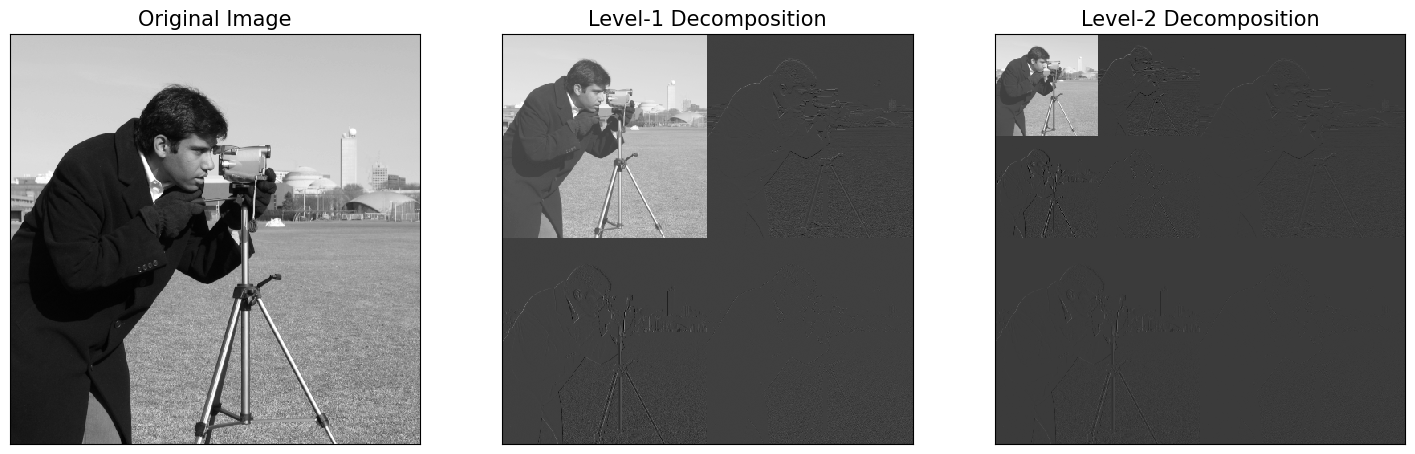

In [29]:
# Load image
original = pywt.data.camera()

fig = plt.figure(figsize=(18, 6))
image_1 = wavelet_decomposition_1(original)
image_2 = wavelet_decomposition_2(original)

tmp = fig.add_subplot(1, 3, 1)
tmp.imshow(original, interpolation="nearest", cmap=plt.cm.gray)
tmp.set_title("Original Image", fontsize=15)
tmp.set_xticks([])
tmp.set_yticks([])

tmp = fig.add_subplot(1, 3, 2)
tmp.imshow(image_1, interpolation="nearest", cmap=plt.cm.gray)
tmp.set_title("Level-1 Decomposition", fontsize=15)
tmp.set_xticks([])
tmp.set_yticks([])

tmp = fig.add_subplot(1, 3, 3)
tmp.imshow(image_2, interpolation="nearest", cmap=plt.cm.gray)
tmp.set_title("Level-2 Decomposition", fontsize=15)
tmp.set_xticks([])
tmp.set_yticks([])
plt.show()

Seperti yang Anda lihat hasil dekomposisi wavelet. Subband yang menampung informasi terbanyak merupakan subband rendah dan bagian terpenting (bagian yang menampung informasi terbanyak) terfokus pada suatu wilayah tertentu. Fitur ini membuat implementasi SPIHT sangat efektif ketika mengkodekan koefisien-koefisien ini.

```image_1``` merupakan hasil dekomposisi wavelet 1 tingkat dan
```image_2``` merupakan hasil dekomposisi wavelet 2 level.

Di sini kami mendefinisikan metode pengkodean kami. Algoritmanya dijelaskan di atas.

Proses DWT melibatkan banyak tingkat dekomposisi, menghasilkan struktur seperti pohon biner yang disebut pohon dekomposisi wavelet. Level teratas mewakili sinyal asli, dan setiap level berikutnya mewakili detail dan perkiraan yang diperoleh dari level sebelumnya.

In [31]:
def spiht_coding(img0):
    # Mendapatkan panjang citra
    img_len = len(img0)

    # Inisialisasi daftar koordinat untuk pass LIP dan LIS
    LIP = [(0, 0), (0, 1), (1, 0), (1, 1)]
    LIS = [['A', (0, 1)], ['A', (1, 0)], ['A', (1, 1)]]

    # Daftar penanda posisi signifikan pada level sebelumnya dan level sekarang
    LSP_old = []
    LSP_new = []

    # String bit sebagai output hasil kompresi
    strbit = ''

    # K adalah jumlah bit yang dibutuhkan untuk merepresentasikan nilai piksel maksimum
    K = int(np.abs(np.log2(np.max(np.abs(img0)))))
    strbit += format(K, '05b')  # Menambahkan nilai K ke string bit dengan panjang 5 bit
    K_eva = K + 1
    iter = K

    print("------------Mulai algoritma pengkodean------------")

    while iter >= 0:
        print("Iterasi: ", iter)

        # Sorting pass LIP
        remove_index = []
        ind = 0
        while ind < len(LIP):
            i = LIP[ind]
            if S(img0[i], K) == 1:
                strbit += '1'
                strbit += signbit(img0[i])
                LSP_new.append(i)
                LIP.pop(ind)
            else:
                strbit += '0'
                ind += 1

        # Sorting pass LIS
        ind = 0
        while ind < len(LIS):
            current_set = LIS[ind][1]

            # Jika set tersebut tipe A
            if LIS[ind][0] == 'A':
                # Periksa apakah turunannya signifikan
                sig = max([S(img0[index], K) for index in D(current_set, img_len)])
                if sig == 1:
                    strbit += '1'
                    # Periksa apakah anaknya signifikan sebelum memeriksa turunannya
                    offsprings = O(current_set, img_len)
                    for offspring in offsprings:
                        if S(img0[offspring], K) == 1:
                            strbit += '1'
                            strbit += signbit(img0[offspring])
                            LSP_new.append(offspring)
                        else:
                            strbit += '0'
                            LIP.append(offspring)

                    # Karena turunan dari set ini signifikan, ini berarti ada
                    # node yang signifikan lain yang bukan anaknya, kita cek dengan menambahkan
                    # sebuah set dengan tipe B
                    L_current = L(current_set, img_len)
                    if L_current:
                        LIS.append(['B', current_set])
                    LIS.pop(ind)
                    continue
                else:
                    strbit += '0'

            # Jika tipe B
            else:
                # Periksa apakah L signifikan
                sig = max([S(img0[index], K) for index in L(current_set, img_len)])
                if sig == 1:
                    strbit += '1'
                    offsprings = O(current_set, img_len)
                    for offspring in offsprings:
                        LIS.append(['A', offspring])
                    LIS.pop(ind)
                    continue
                else:
                    strbit += '0'
            ind += 1

        # Menambahkan bit yang menyatakan signifikansi dari posisi pada level sebelumnya
        for i in LSP_old:
            value = img0[i]
            kbit = abs(int(value)) & (1 << (K))
            if kbit > 0:
                strbit += '1'
            else:
                strbit += '0'

        # Memperbarui daftar posisi signifikan pada level sebelumnya dan level sekarang
        LSP_old = LSP_old + LSP_new
        LSP_new = []

        iter -= 1
        K -= 1

    print("------------Selesai algoritma pengkodean------------")
    print("Panjang total bit stream: ", len(strbit))
    print("Rasio Kompresi: ", (len(strbit))/(K_eva * img_len * img_len) * 100.0, "%")
    print("\n\n")
    return strbit


Sekarang kita akan mencoba mengkodekan gambar di atas

In [33]:
strbit_1 = spiht_coding(image_1)
strbit_2 = spiht_coding(image_2)
strbit_3 = spiht_coding(original)

------------Mulai algoritma pengkodean------------
Iterasi:  9
Iterasi:  8
Iterasi:  7
Iterasi:  6
Iterasi:  5
Iterasi:  4
Iterasi:  3
Iterasi:  2
Iterasi:  1
Iterasi:  0
------------Selesai algoritma pengkodean------------
Panjang total bit stream:  1658324
Rasio Kompresi:  63.260040283203125 %



------------Mulai algoritma pengkodean------------
Iterasi:  11
Iterasi:  10
Iterasi:  9
Iterasi:  8
Iterasi:  7
Iterasi:  6
Iterasi:  5
Iterasi:  4
Iterasi:  3
Iterasi:  2
Iterasi:  1
Iterasi:  0
------------Selesai algoritma pengkodean------------
Panjang total bit stream:  1681671
Rasio Kompresi:  53.45888137817383 %



------------Mulai algoritma pengkodean------------
Iterasi:  7
Iterasi:  6
Iterasi:  5
Iterasi:  4
Iterasi:  3
Iterasi:  2
Iterasi:  1
Iterasi:  0
------------Selesai algoritma pengkodean------------
Panjang total bit stream:  2269501
Rasio Kompresi:  108.21824073791504 %





Setelah mengkodekannya, aliran bit dikembalikan sebagai string. Karena terlalu besar, kami tidak akan menampilkannya melainkan rasio kompresi dan indeks iterasi.

Hasilnya, pada gambar dekomposisi 1 tingkat, rasio kompresi (*63,26%*) lebih besar dibandingkan gambar dekomposisi 2 tingkat (*53,46%*), yang berarti kompresi ```gambar_2``` lebih baik. Di sisi lain, panjang aliran bit gambar dekomposisi 1 tingkat (*207,3 KB*) masih lebih kecil atau lebih baik dibandingkan dekomposisi 2 tingkat (*210,21 KB*) karena panjang biner tetapnya lebih kecil (9 bit) dibandingkan ke dekomposisi 2 tingkat (11 bit). Dibandingkan dengan gambar asli (*sekitar 262,14 KB*), rasio kompresi ```gambar_1``` adalah sekitar 79,07% dan ```gambar_2``` adalah 80,19%. Jadi pemilihan tingkat dekomposisi akan berbeda-beda tergantung fitur data yang akan kita kirimkan.

In [34]:
def spiht_decoding(strbit, img_len, level):
    # Rekonstruksi bagian
    # Mengambil input sebagai bit

    # Mendapatkan nilai K dari 5 bit pertama string bit
    K_re = int(strbit[0:5], 2)

    # Inisialisasi matriks untuk rekonstruksi citra
    img_re = [[[0 for z in range(K_re + 2)] for x in range(img_len)] for y in range(img_len)]

    # Inisialisasi daftar koordinat untuk pass LIP dan LIS
    LIP_re = [(0, 0), (0, 1), (1, 0), (1, 1)]
    LIS_re = [['A', (0, 1)], ['A', (1, 0)], ['A', (1, 1)]]

    # Daftar penanda posisi signifikan pada level sebelumnya dan level sekarang
    LSP_old_re = []
    LSP_new_re = []

    # Inisialisasi iterasi
    iter_re = 5

    while iter_re < len(strbit):
        # Sorting pass LIP
        lip_ind = 0
        while lip_ind < len(LIP_re):
            if strbit[iter_re] == '1':
                img_re[LIP_re[lip_ind][0]][LIP_re[lip_ind][1]][- (K_re + 1)] = 1
                iter_re += 1
                img_re[LIP_re[lip_ind][0]][LIP_re[lip_ind][1]][0] = int(strbit[iter_re])
                iter_re += 1
                LSP_new_re.append(LIP_re[lip_ind])
                LIP_re.pop(lip_ind)
                continue
            else:
                iter_re += 1
            lip_ind += 1

        # Sorting pass LIS
        lis_ind = 0
        while lis_ind < len(LIS_re):
            current_set = LIS_re[lis_ind][1]

            # Set ini tipe A
            if LIS_re[lis_ind][0] == 'A':
                if strbit[iter_re] == '0':
                    iter_re += 1
                else:
                    iter_re += 1
                    offsprings = O(current_set, img_len)

                    # Rekonstruksi anak-anaknya
                    for offspring in offsprings:
                        if strbit[iter_re] == '0':
                            iter_re += 1
                            LIP_re.append(offspring)
                        else:
                            img_re[offspring[0]][offspring[1]][- (K_re + 1)] = 1
                            iter_re += 1
                            img_re[offspring[0]][offspring[1]][0] = int(strbit[iter_re])
                            iter_re += 1
                            LSP_new_re.append(offspring)

                    # Menambahkan tipe B jika perlu
                    L_current = L(current_set, img_len)
                    if L_current:
                        LIS_re.append(['B', current_set])
                    LIS_re.pop(lis_ind)
                    continue
            # Tipe B
            else:
                if strbit[iter_re] == '0':
                    iter_re += 1
                else:
                    iter_re += 1
                    offsprings = O(current_set, img_len)

                    # Menambahkan anak-anaknya ke daftar LIS
                    for offspring in offsprings:
                        LIS_re.append(['A', offspring])
                    LIS_re.pop(lis_ind)
                    continue
            lis_ind += 1

        # Bagian Refinement
        for i in LSP_old_re:
            if strbit[iter_re] == '1':
                img_re[i[0]][i[1]][- (K_re + 1)] = 1
            iter_re += 1

        # Memperbarui daftar posisi signifikan pada level sebelumnya dan level sekarang
        LSP_old_re = LSP_old_re + LSP_new_re
        LSP_new_re = []

        K_re -= 1
        # Memperbarui level
        if level >= 0:
            level -= 1
            if level <= 0:
                break

    # Menghasilkan citra rekonstruksi dari matriks img_re
    re_img = np.array(reconstruct_img(img_re, img_len, img_len))
    return re_img

# Contoh penggunaan:
# img_re = spiht_decoding(strbit, 256, level)
# re_img = np.array(reconstruct_img(img_re, img_len, img_len))
# re_img = re_img / 2 + 255
# plt.imshow(re_img, interpolation="nearest", cmap=plt.cm.gray)
# plt.show()


Sekarang kita akan mengimplementasikan decoding ke aliran bit keluaran dengan ```image_1``` dan ```image_2``` dan merekonstruksinya. Dan untuk tujuan demonstrasi, kami akan merekonstruksi 8 tingkat rekonstruksi ```gambar_1``` lainnya untuk melihat bagaimana gambar akan ditampilkan dalam skema transmisi progresif.

In [35]:
reconstruct_img_0 = wavelet_reconstruct_1(spiht_decoding(strbit_1, 512, -1))
reconstruct_img_1 = wavelet_reconstruct_1(spiht_decoding(strbit_1, 512, 1))
reconstruct_img_2 = wavelet_reconstruct_1(spiht_decoding(strbit_1, 512, 2))
reconstruct_img_3 = wavelet_reconstruct_1(spiht_decoding(strbit_1, 512, 3))

reconstruct_img_4 = wavelet_reconstruct_1(spiht_decoding(strbit_1, 512, 4))
reconstruct_img_5 = wavelet_reconstruct_1(spiht_decoding(strbit_1, 512, 5))
reconstruct_img_6 = wavelet_reconstruct_1(spiht_decoding(strbit_1, 512, 6))

reconstruct_img_7 = wavelet_reconstruct_1(spiht_decoding(strbit_1, 512, 7))
reconstruct_img_8 = wavelet_reconstruct_1(spiht_decoding(strbit_1, 512, 8))

reconstruct_img2_0 = wavelet_reconstruct_2(spiht_decoding(strbit_2, 512, -1))

[]

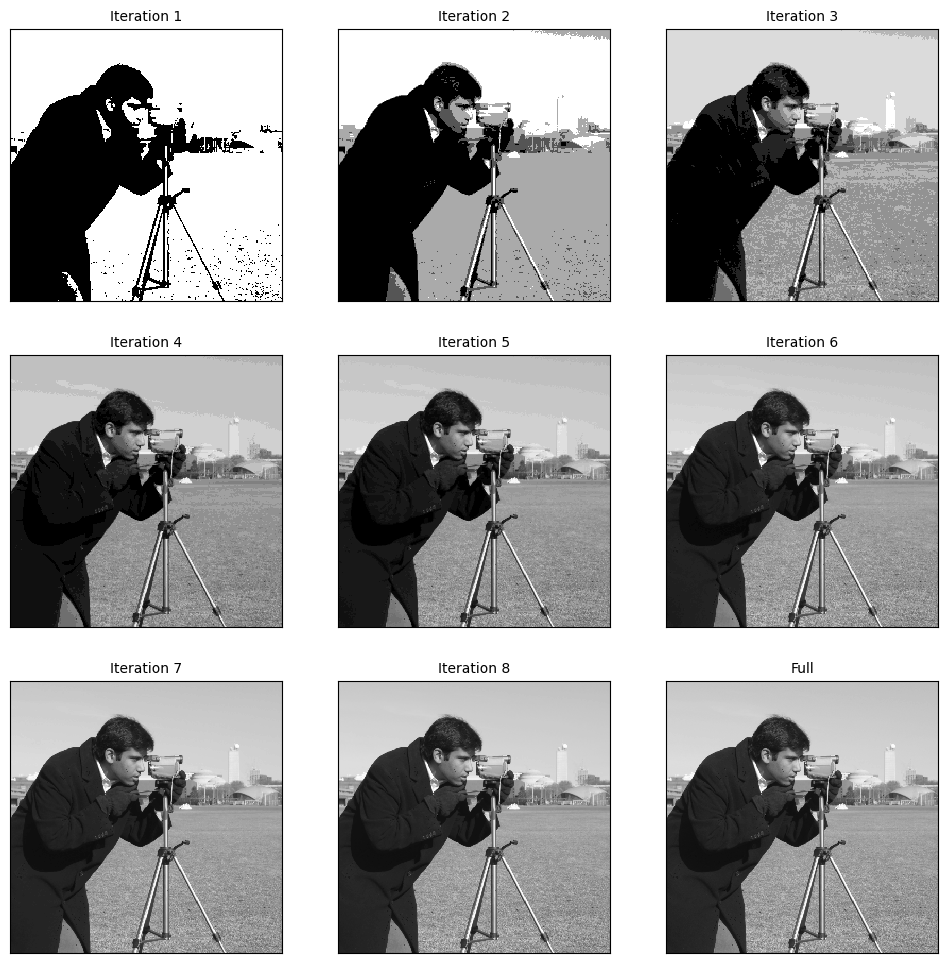

In [37]:

fig = plt.figure(figsize=(12, 12))

original_img = fig.add_subplot(3, 3, 1)
original_img.imshow(reconstruct_img_1, interpolation="nearest", cmap=plt.cm.gray)
original_img.set_title("Iteration 1", fontsize=10)
original_img.set_xticks([])
original_img.set_yticks([])


tmp = fig.add_subplot(3, 3, 2)
tmp.imshow(reconstruct_img_2, interpolation="nearest", cmap=plt.cm.gray)
tmp.set_title("Iteration 2", fontsize=10)
tmp.set_xticks([])
tmp.set_yticks([])

tmp = fig.add_subplot(3, 3, 3)
tmp.imshow(reconstruct_img_3, interpolation="nearest", cmap=plt.cm.gray)
tmp.set_title("Iteration 3", fontsize=10)
tmp.set_xticks([])
tmp.set_yticks([])

tmp = fig.add_subplot(3, 3, 4)
tmp.imshow(reconstruct_img_4, interpolation="nearest", cmap=plt.cm.gray)
tmp.set_title("Iteration 4", fontsize=10)
tmp.set_xticks([])
tmp.set_yticks([])

tmp = fig.add_subplot(3, 3, 5)
tmp.imshow(reconstruct_img_5, interpolation="nearest", cmap=plt.cm.gray)
tmp.set_title("Iteration 5", fontsize=10)
tmp.set_xticks([])
tmp.set_yticks([])

tmp = fig.add_subplot(3, 3, 6)
tmp.imshow(reconstruct_img_6, interpolation="nearest", cmap=plt.cm.gray)
tmp.set_title("Iteration 6", fontsize=10)
tmp.set_xticks([])
tmp.set_yticks([])

tmp = fig.add_subplot(3, 3, 7)
tmp.imshow(reconstruct_img_7, interpolation="nearest", cmap=plt.cm.gray)
tmp.set_title("Iteration 7", fontsize=10)
tmp.set_xticks([])
tmp.set_yticks([])

tmp = fig.add_subplot(3, 3, 8)
tmp.imshow(reconstruct_img_8, interpolation="nearest", cmap=plt.cm.gray)
tmp.set_title("Iteration 8", fontsize=10)
tmp.set_xticks([])
tmp.set_yticks([])

tmp = fig.add_subplot(3, 3, 9)
tmp.imshow(reconstruct_img_0, interpolation="nearest", cmap=plt.cm.gray)
tmp.set_title("Full", fontsize=10)
tmp.set_xticks([])
tmp.set_yticks([])

Di atas adalah 9 iterasi rekonstruksi ```image_1```. Seperti yang dapat kita lihat dari iterasi pertama, kita telah melihat struktur detail gambar. Dari iterasi 6, citra yang kami persepsikan hampir sempurna meskipun koefisiennya belum lengkap.

Terakhir, mari pertimbangkan PSNR kompresi kita. Rasio signal-to-noise puncak (PSNR) adalah rasio antara kekuatan maksimum yang mungkin dari suatu sinyal dan kekuatan kebisingan yang merusak yang mempengaruhi ketepatan representasinya. [5] Semakin besar PSNR maka kualitas rekonstruksi semakin baik.
$$PSNR = 10 \cdot log_{10}(\frac{MAX^{2}_{I}}{MSE})$$
Di sini, $MAX_{I}$ adalah nilai piksel maksimum yang mungkin pada gambar. Dengan contoh kita, setiap piksel berukuran 8 bit sehingga $MAX_{I} = 255$. Karena gambar yang direkonstruksi masih dalam tipe ```float64```, kami akan melakukan pembulatan piksel sebelum menghitung nilai PSNR kedua gambar.

In [38]:
psnr = cv2.PSNR(np.around(reconstruct_img_0).astype(original.dtype), original)
print("Image_0 PSNR = ", psnr)
psnr = cv2.PSNR(np.around(reconstruct_img2_0).astype(original.dtype), original)
print("Image_1 PSNR = ", psnr)


Image_0 PSNR =  43.20447220931244
Image_1 PSNR =  48.04632697430712


Gambar yang direkonstruksi dari dekomposisi wavelet 1 tingkat memiliki PSNR sekitar *43,2 dB*, yang lebih kecil dibandingkan dengan dekomposisi 2 tingkat (*48,05 dB*). Hal ini berarti dekomposisi wavelet 2 tingkat mempunyai kualitas yang lebih baik. Namun dengan kedalaman bit 8, kedua metode dekomposisi tersebut telah menghasilkan kualitas gambar yang direkonstruksi dengan baik.